#### Z-score Calculation

In [42]:
import pandas as pd 
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


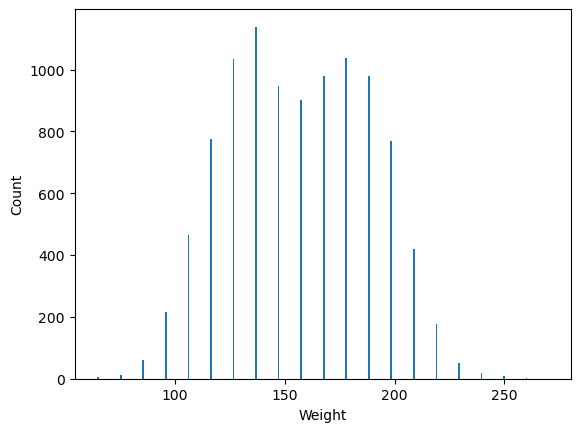

In [44]:
plt.hist(df['Weight'],bins=20,width=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [45]:
df['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

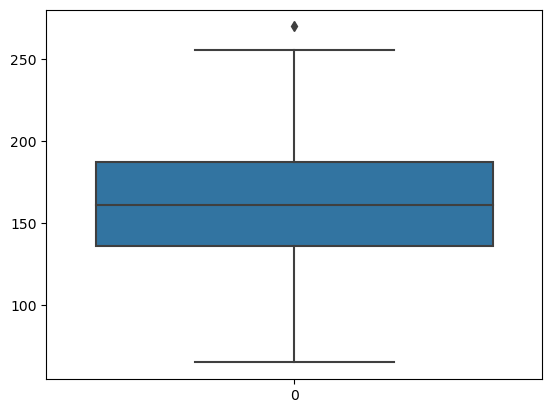

In [46]:
import seaborn as sns
sns.boxplot(df['Weight'])
plt.show()

<Axes: >

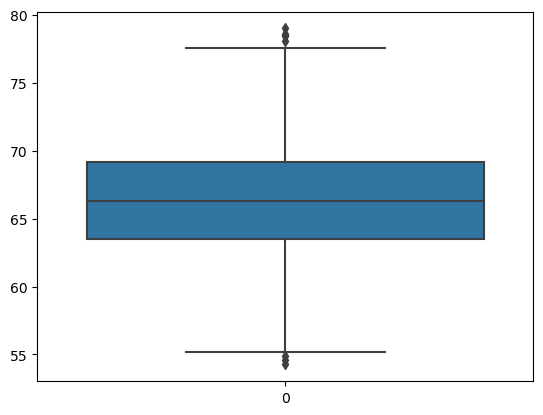

In [47]:
sns.boxplot(df['Height'])

In [48]:
# to get outlier values 
# three standard deviations on both sides of mean
upper = df.Weight.mean() + 3 * df.Weight.std()
lower = df.Weight.mean() - 3 * df.Weight.std()

print(upper)
print(lower)

257.7656738523894
65.11503981327212


In [49]:
print(df.head())
print(df.shape)

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
(10000, 3)


In [50]:
# removeing outliers 
new_df = df[(df['Weight'] < upper) & (df['Weight']>lower)]
print(new_df.head())
print(new_df.shape)

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
(9998, 3)


In [51]:
# using z score formula to find z score 
df['zscore'] = (df['Weight'] - df['Weight'].mean())/ df['Weight'].std()
df

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,2.505672
1,Male,68.781904,162.310473,0.027099
2,Male,74.110105,212.740856,1.597726
3,Male,71.730978,220.042470,1.825131
4,Male,69.881796,206.349801,1.398680
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.768113
9996,Female,67.067155,170.867906,0.293616
9997,Female,63.867992,128.475319,-1.026678
9998,Female,69.034243,163.852461,0.075124


In [68]:
# Removing Outilers using z score 

print(df[df['zscore'] > 3])
print(df[df['zscore'] < -3])

     Gender     Height      Weight    zscore
2014   Male  78.998742  269.989699  3.380711
      Gender     Height     Weight    zscore
9285  Female  54.263133  64.700127 -3.012922
